RAINFALL WEATHER FORECASTING

Since, this is both a Classification as well as Regression project, we import libraries accordingly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

Import Dataset from GitHub

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(8425, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We have a lot of rows and even columns with null values, which need to be removed or treated.

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

I would not be dropping any null columns here for feature variables as I feel they are important columns for prediction

Rather, I would impute the null columns for the same

First, let's seperate the date column

In [6]:
df['Year'] = [i.split('-')[0] for i in df['Date']]
df['Month'] = [i.split('-')[1] for i in df['Date']]
df['Day'] = [i.split('-')[2] for i in df['Date']]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,06,21
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,06,22
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,06,23
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,06,24


In [7]:
df = df.drop(columns = ['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,06,21
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,06,22
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,06,23
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,06,24


Convert Categorical columns to float

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [9]:
df['Year'] = df['Year'].astype(float)
df['Month'] = df['Month'].astype(float)
df['Day'] = df['Day'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [10]:
categorical_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm']

In [11]:
for i in categorical_columns:
    print(df[i].unique())

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab = LabelEncoder()

In [14]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008.0,12.0,1.0
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008.0,12.0,2.0
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008.0,12.0,3.0
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008.0,12.0,4.0
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017.0,6.0,21.0
8421,9,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017.0,6.0,22.0
8422,9,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017.0,6.0,23.0
8423,9,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017.0,6.0,24.0


In [15]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
dtype: int64

Now, let's use iterative imputer on all feature columns with null values

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
ii = IterativeImputer()

In [18]:
iter_col = pd.DataFrame(ii.fit_transform(df[['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]),
                        columns = ['MinTemp1','MaxTemp1','Evaporation1','Sunshine1','WindGustSpeed1','WindSpeed9am1','WindSpeed3pm1','Humidity9am1','Humidity3pm1','Pressure9am1','Pressure3pm1','Cloud9am1','Cloud3pm1','Temp9am1','Temp3pm1'])

df = df.join(iter_col)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.173594,16.9,21.8
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.041577,1.656602,17.2,24.3
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.101106,2.000000,21.0,23.2
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.451296,1.077309,18.1,26.5
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,13.0,11.0,51.0,24.0,1024.6,1020.3,0.662706,1.515771,10.1,22.4
8421,9,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,13.0,9.0,56.0,21.0,1023.5,1019.1,0.531724,1.089647,10.9,24.5
8422,9,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,9.0,9.0,53.0,24.0,1021.0,1016.8,0.773309,1.513927,12.5,26.1
8423,9,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [19]:
drop_columns = ['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [20]:
df = df.drop(columns = drop_columns, axis=1)
df

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,No,No,2008.0,12.0,1.0,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,No,No,2008.0,12.0,2.0,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,No,No,2008.0,12.0,3.0,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,No,No,2008.0,12.0,4.0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,No,No,2008.0,12.0,5.0,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,0.0,0,9,1,No,No,2017.0,6.0,21.0,...,13.0,11.0,51.0,24.0,1024.6,1020.3,0.662706,1.515771,10.1,22.4
8421,9,0.0,6,9,3,No,No,2017.0,6.0,22.0,...,13.0,9.0,56.0,21.0,1023.5,1019.1,0.531724,1.089647,10.9,24.5
8422,9,0.0,3,9,14,No,No,2017.0,6.0,23.0,...,9.0,9.0,53.0,24.0,1021.0,1016.8,0.773309,1.513927,12.5,26.1
8423,9,0.0,9,10,3,No,No,2017.0,6.0,24.0,...,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [21]:
df.isnull().sum()

Location            0
Rainfall          240
WindGustDir         0
WindDir9am          0
WindDir3pm          0
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
MinTemp1            0
MaxTemp1            0
Evaporation1        0
Sunshine1           0
WindGustSpeed1      0
WindSpeed9am1       0
WindSpeed3pm1       0
Humidity9am1        0
Humidity3pm1        0
Pressure9am1        0
Pressure3pm1        0
Cloud9am1           0
Cloud3pm1           0
Temp9am1            0
Temp3pm1            0
dtype: int64

In [22]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        8079 non-null   int32  
 1   Rainfall        8079 non-null   float64
 2   WindGustDir     8079 non-null   int32  
 3   WindDir9am      8079 non-null   int32  
 4   WindDir3pm      8079 non-null   int32  
 5   RainToday       8079 non-null   object 
 6   RainTomorrow    8079 non-null   object 
 7   Year            8079 non-null   float64
 8   Month           8079 non-null   float64
 9   Day             8079 non-null   float64
 10  MinTemp1        8079 non-null   float64
 11  MaxTemp1        8079 non-null   float64
 12  Evaporation1    8079 non-null   float64
 13  Sunshine1       8079 non-null   float64
 14  WindGustSpeed1  8079 non-null   float64
 15  WindSpeed9am1   8079 non-null   float64
 16  WindSpeed3pm1   8079 non-null   float64
 17  Humidity9am1    8079 non-null   f

Convert RainToday and RainTomorrow columns

In [23]:
ra0 = []
for i in df['RainToday']:
    if i == 'No':
        ra0.append(0)
    else:
        ra0.append(1)
        
df['RainToday']=ra0

ra1 = []
for i in df['RainTomorrow']:
    if i == 'No':
        ra1.append(0)
    else:
        ra1.append(1)
        
df['RainTomorrow']=ra0

df.head(10)

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,0,0,2008.0,12.0,1.0,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,0,0,2008.0,12.0,2.0,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,0,0,2008.0,12.0,3.0,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,0,0,2008.0,12.0,4.0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,0,0,2008.0,12.0,5.0,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
5,1,0.2,14,13,13,0,0,2008.0,12.0,6.0,...,19.0,24.0,55.0,23.0,1009.2,1005.4,2.770059,2.664609,20.6,28.9
6,1,0.0,13,12,13,0,0,2008.0,12.0,7.0,...,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,1.789852,18.1,24.6
7,1,0.0,13,10,13,0,0,2008.0,12.0,8.0,...,6.0,17.0,48.0,19.0,1013.4,1010.1,0.899985,1.319043,16.3,25.5
8,1,0.0,6,9,7,0,0,2008.0,12.0,9.0,...,7.0,28.0,42.0,9.0,1008.9,1003.6,0.441913,1.316235,18.3,30.2
9,1,1.4,13,8,10,1,1,2008.0,12.0,10.0,...,15.0,11.0,58.0,27.0,1007.0,1005.7,2.441425,2.515289,20.1,28.2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        8079 non-null   int32  
 1   Rainfall        8079 non-null   float64
 2   WindGustDir     8079 non-null   int32  
 3   WindDir9am      8079 non-null   int32  
 4   WindDir3pm      8079 non-null   int32  
 5   RainToday       8079 non-null   int64  
 6   RainTomorrow    8079 non-null   int64  
 7   Year            8079 non-null   float64
 8   Month           8079 non-null   float64
 9   Day             8079 non-null   float64
 10  MinTemp1        8079 non-null   float64
 11  MaxTemp1        8079 non-null   float64
 12  Evaporation1    8079 non-null   float64
 13  Sunshine1       8079 non-null   float64
 14  WindGustSpeed1  8079 non-null   float64
 15  WindSpeed9am1   8079 non-null   float64
 16  WindSpeed3pm1   8079 non-null   float64
 17  Humidity9am1    8079 non-null   f

In [25]:
df = df.drop_duplicates()
df.shape

(6577, 25)

Dropped all nulls and duplicates from our dataset

In [26]:
df.describe()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
count,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,...,6577.00000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000
mean,5.320207,2.768086,8.801277,8.524403,8.129086,0.236430,0.236430,2012.039836,6.433632,15.741219,...,12.72497,17.477334,67.457703,50.451807,1017.891784,1015.329129,4.174435,4.154884,17.895314,22.685088
std,3.105398,10.588861,5.355450,5.098607,4.772778,0.424922,0.424922,2.302594,3.356986,8.798895,...,9.81284,9.565268,17.224820,18.593139,6.117837,6.032154,2.683922,2.526557,5.734827,5.984886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,...,0.00000,0.000000,10.000000,6.000000,989.800000,982.900000,-1.851719,-2.647508,1.900000,7.300000
25%,2.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,2010.000000,4.000000,8.000000,...,6.00000,9.000000,56.000000,38.000000,1014.200000,1011.500000,1.661360,2.000000,13.800000,18.300000
50%,6.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,2012.000000,6.000000,16.000000,...,11.00000,17.000000,68.000000,50.000000,1018.100000,1015.500000,4.059864,4.000000,17.900000,22.100000
75%,8.000000,0.800000,14.000000,13.000000,12.000000,0.000000,0.000000,2014.000000,9.000000,23.000000,...,19.00000,24.000000,80.000000,63.000000,1021.500000,1018.800000,7.000000,7.000000,22.200000,26.800000
max,11.000000,371.000000,16.000000,16.000000,16.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,...,61.00000,83.000000,100.000000,99.000000,1039.000000,1036.000000,10.130503,9.883757,39.400000,44.100000


Now that we have treated and cleaned our dataset, let's begin visualizing our data

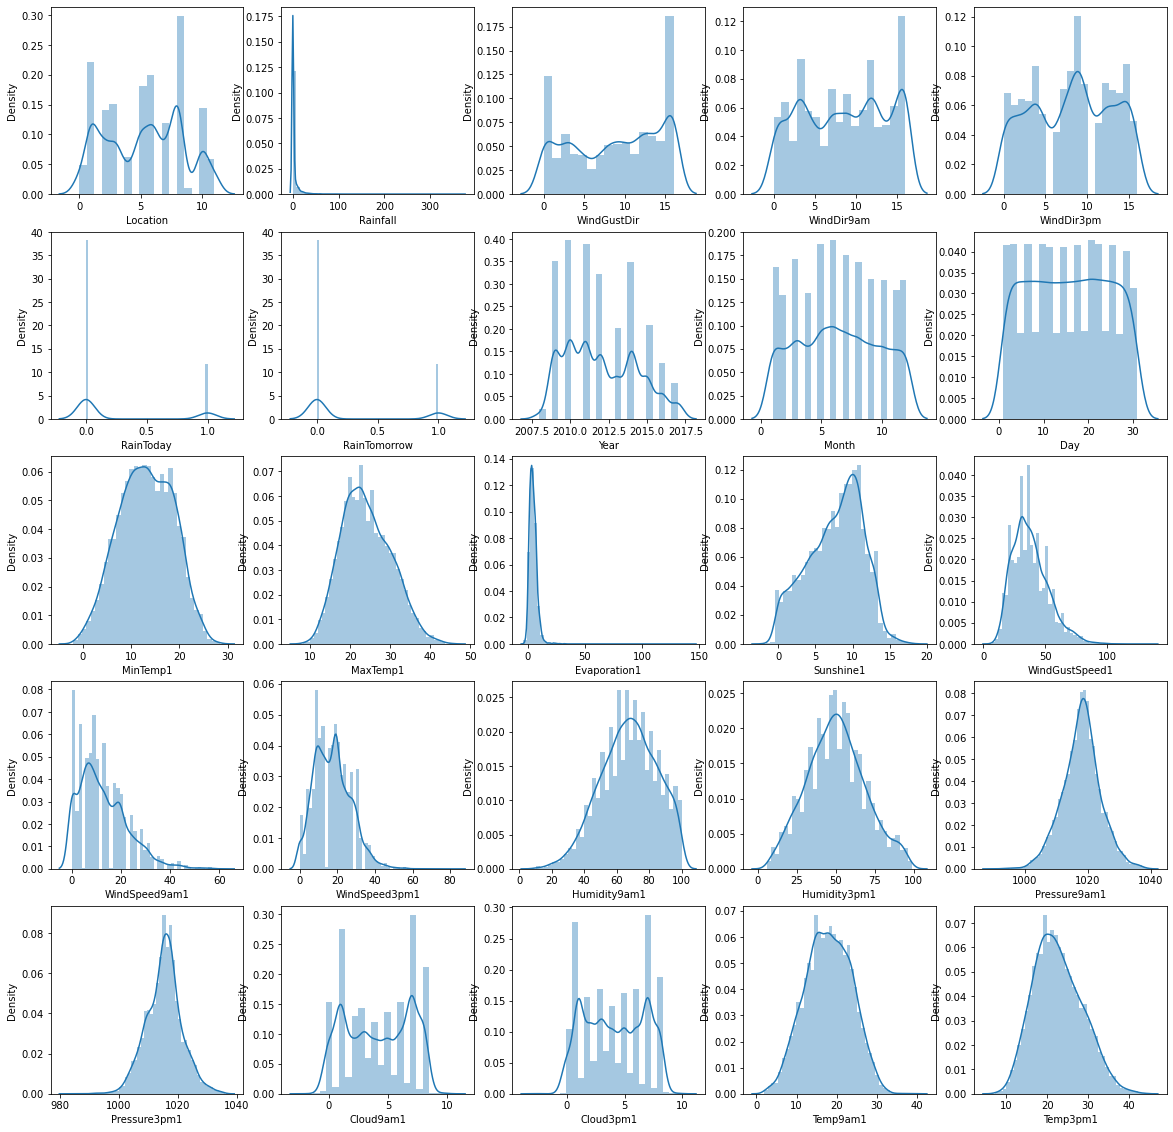

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

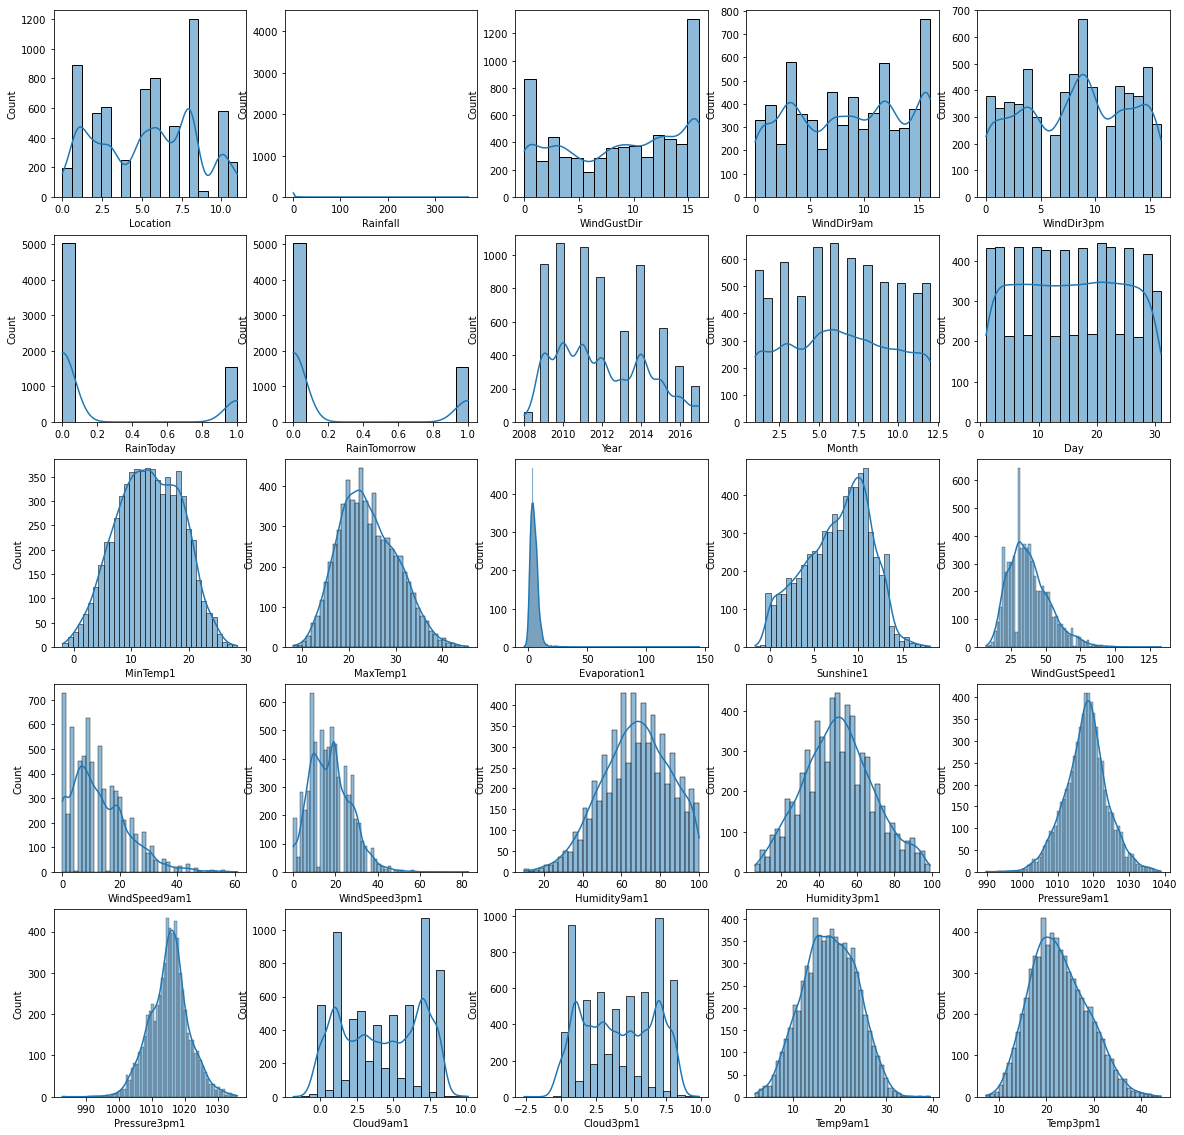

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

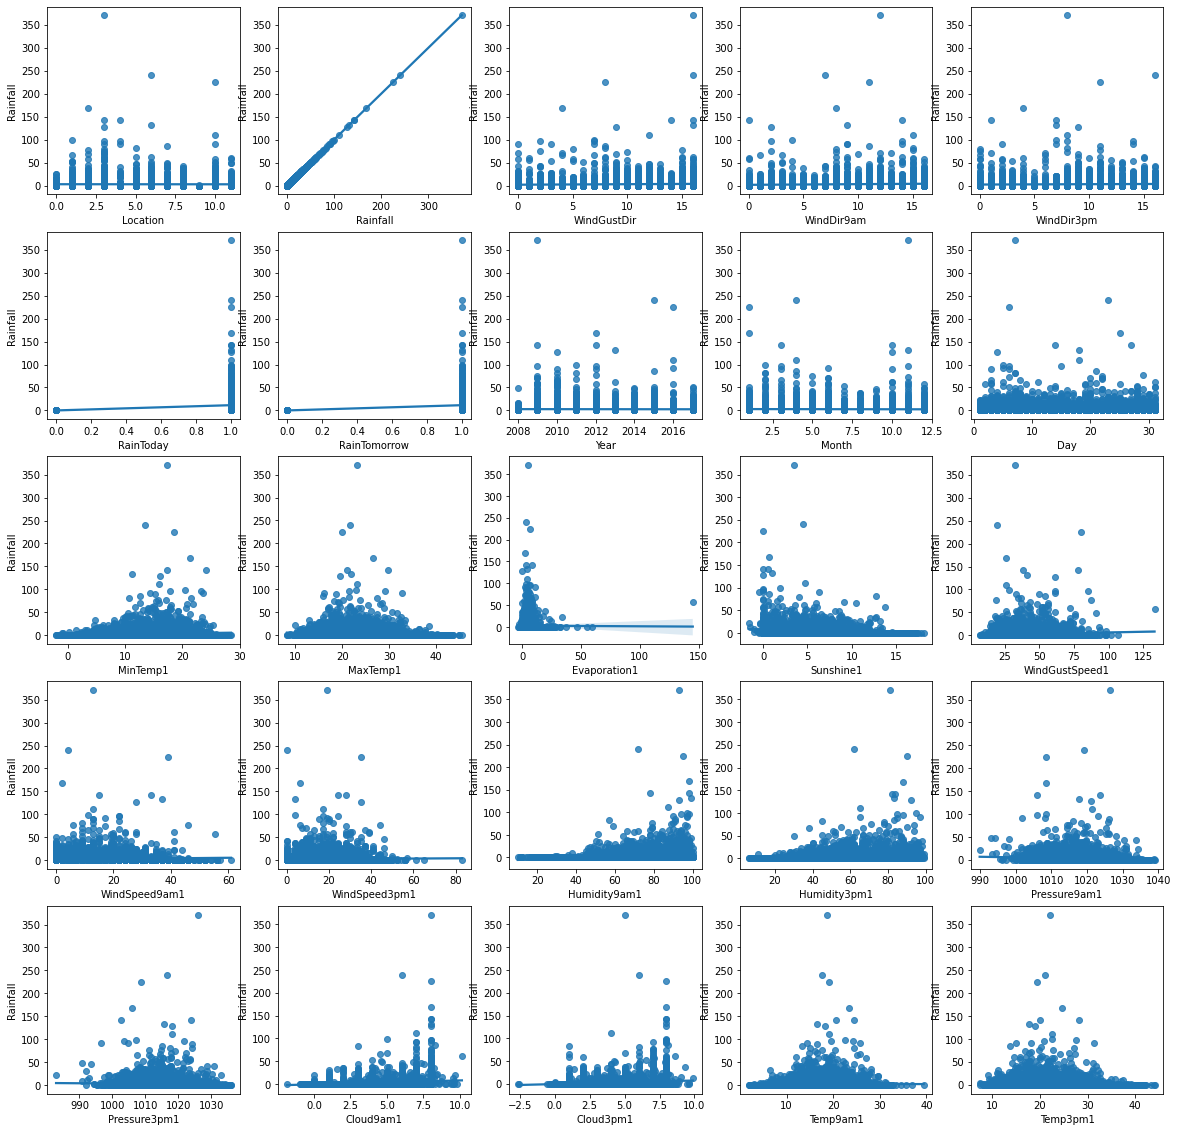

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.regplot(x=column,y='Rainfall',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

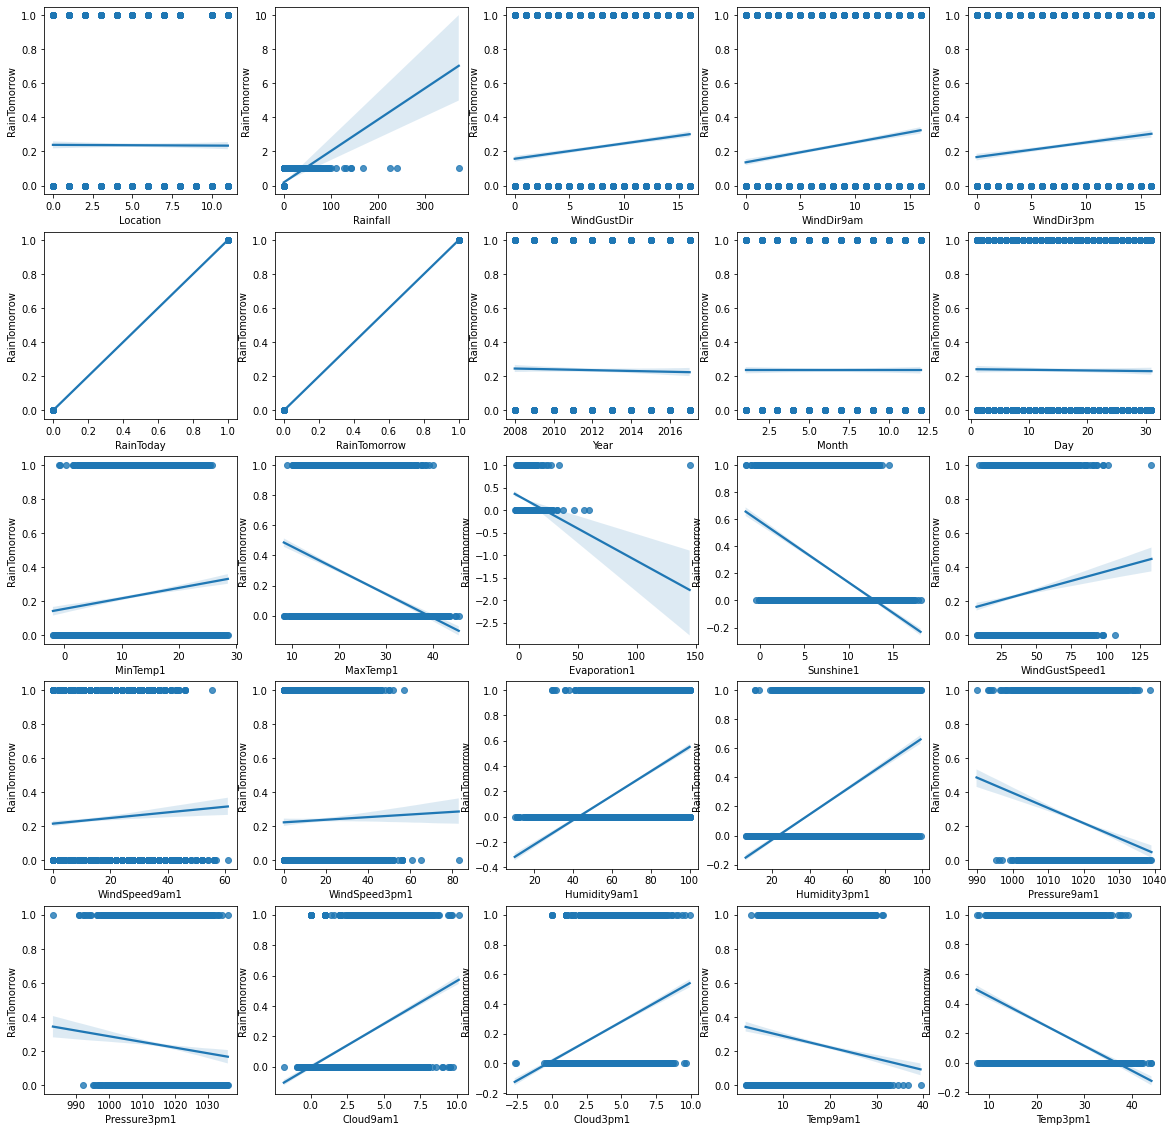

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.regplot(x=column,y='RainTomorrow',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

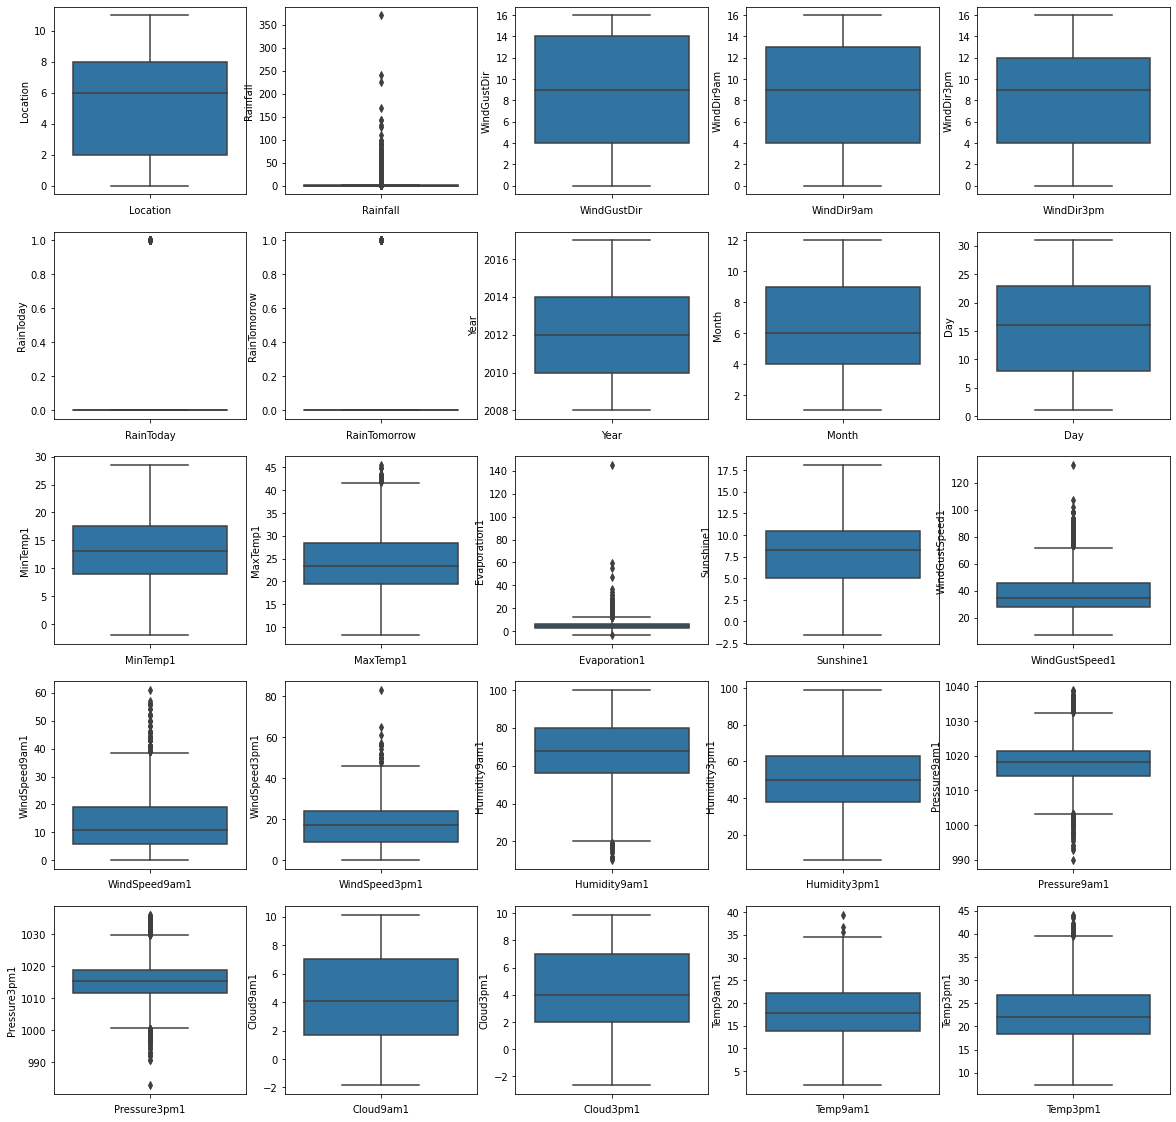

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see, we have a lot of outliers in our data that need to be removed.

In [32]:
from scipy import stats

In [33]:
from scipy.stats import zscore

z_score = zscore(df[['Rainfall','Evaporation1','WindGustSpeed1','WindSpeed9am1','WindSpeed3pm1','Pressure9am1','Pressure3pm1']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(6291, 25)

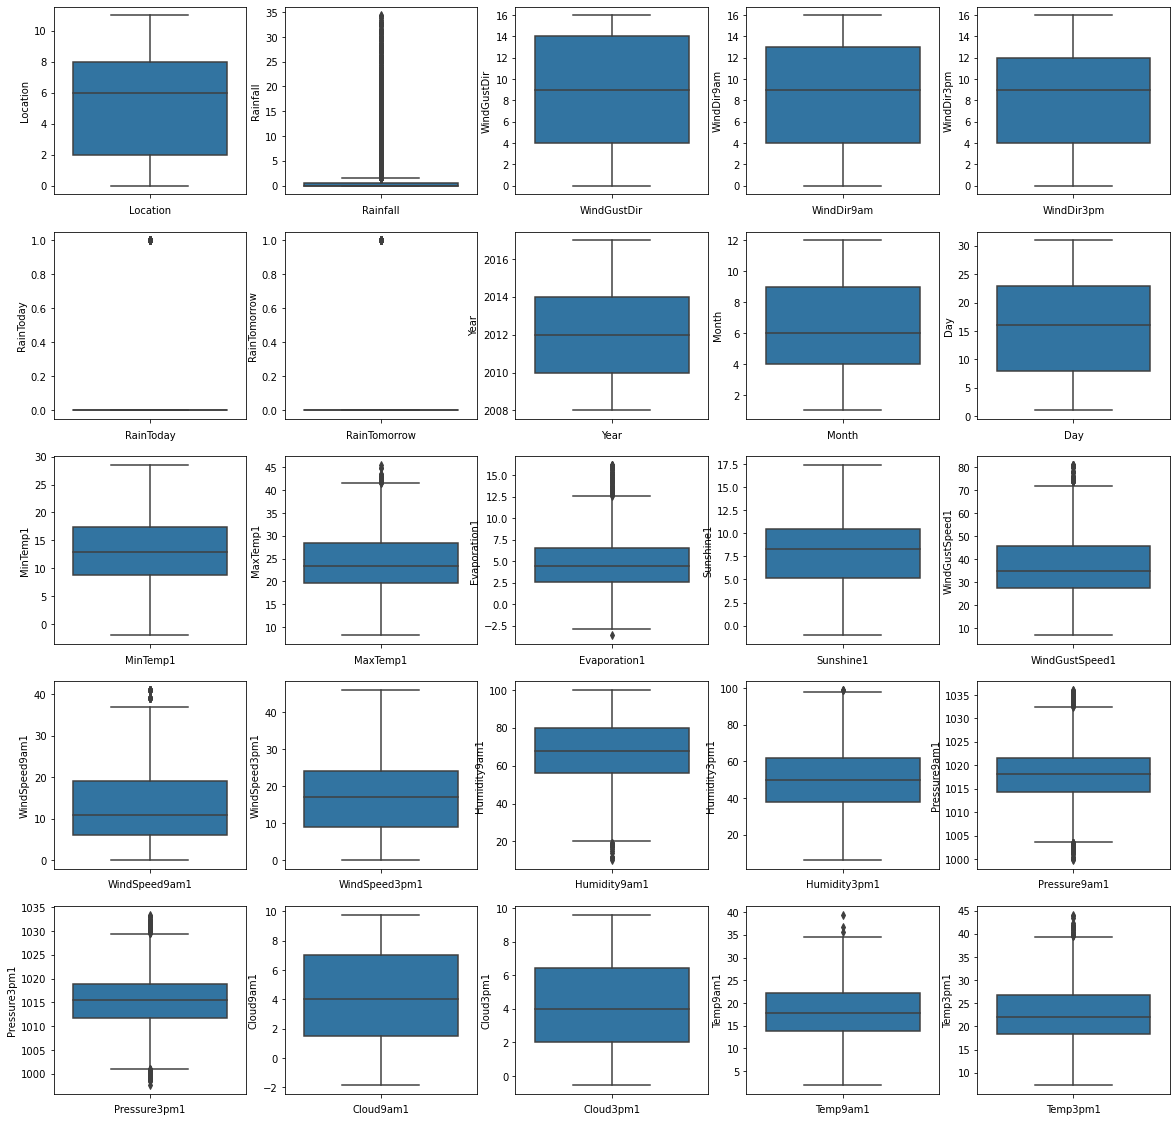

In [34]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [35]:
z_score = zscore(df[['Rainfall','Evaporation1','WindGustSpeed1','WindSpeed9am1','WindSpeed3pm1','Pressure9am1','Pressure3pm1']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(5996, 25)

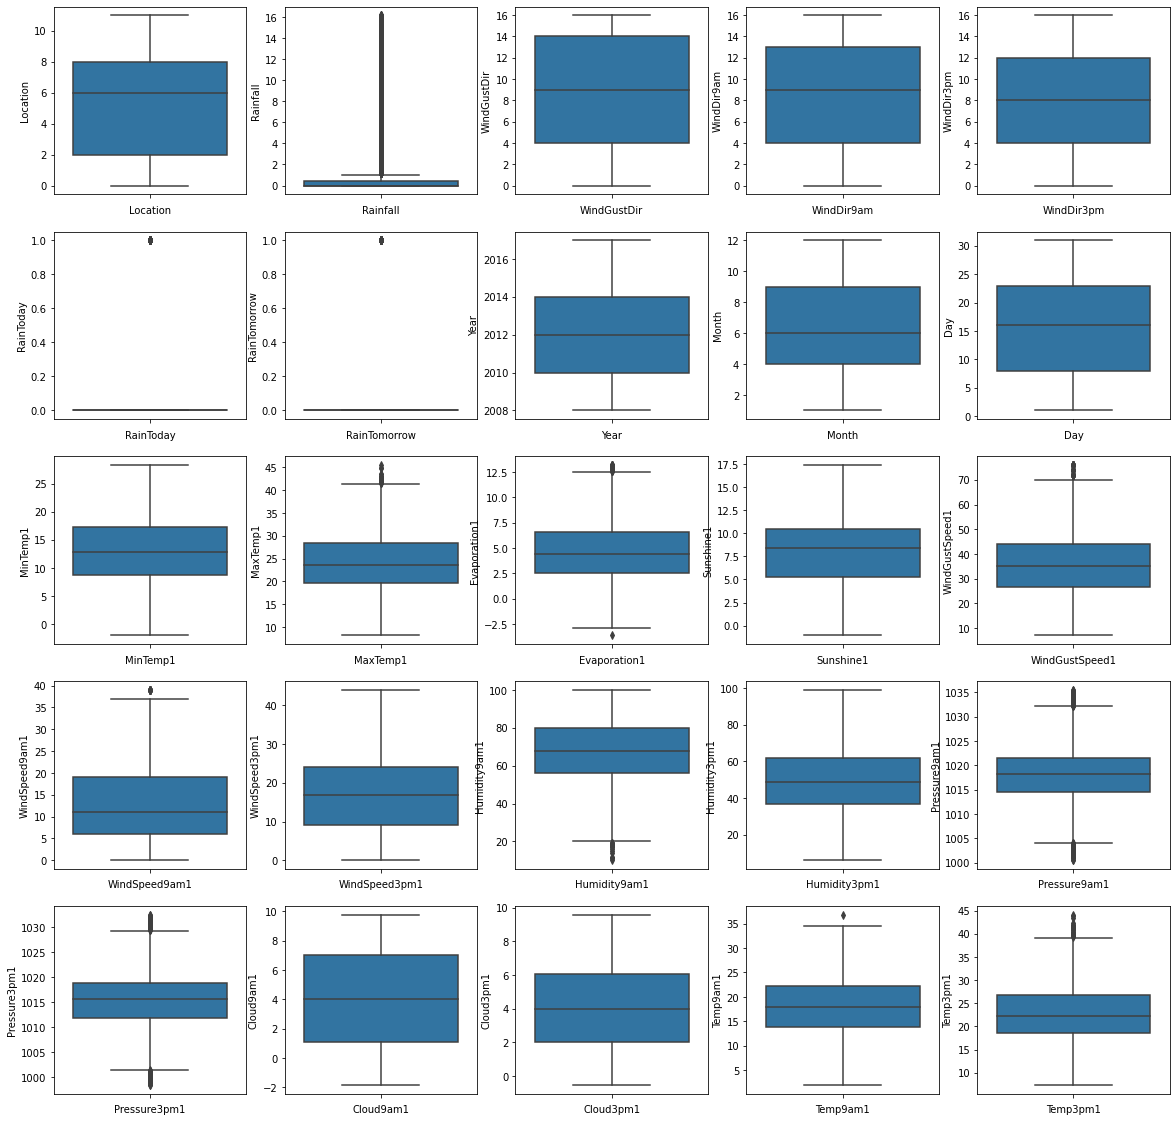

In [36]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see decrease in outliers, I will not be removing them further to maintain >90% of our original dataset

Let's check the heatmap for any multi-collinearity problems

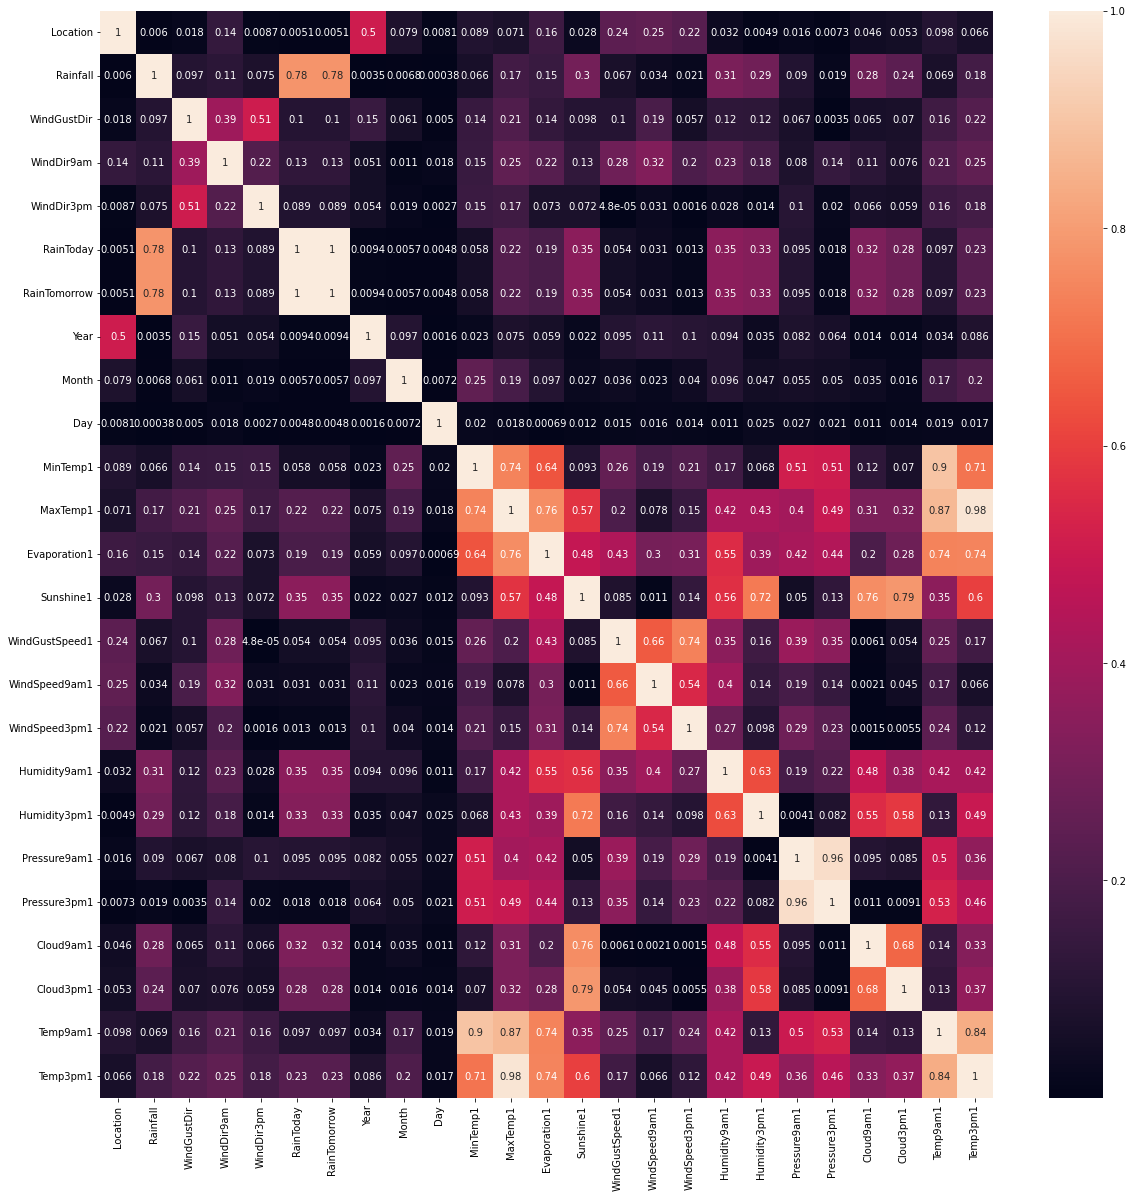

In [37]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

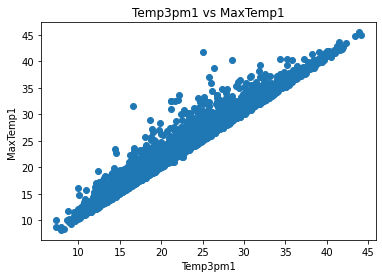

In [38]:
plt.scatter(df['Temp3pm1'], df['MaxTemp1'])
plt.xlabel('Temp3pm1')
plt.ylabel('MaxTemp1')
plt.title('Temp3pm1 vs MaxTemp1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

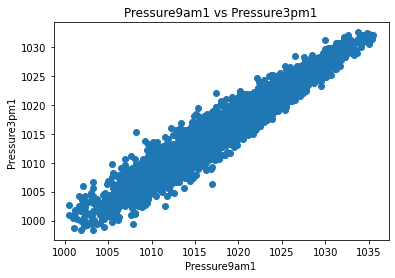

In [39]:
plt.scatter(df['Pressure9am1'], df['Pressure3pm1'])
plt.xlabel('Pressure9am1')
plt.ylabel('Pressure3pm1')
plt.title('Pressure9am1 vs Pressure3pm1')
plt.show

In [40]:
drop = ['MaxTemp1','Pressure3pm1']
df = df.drop(columns = drop, axis=1)
df

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,0,0,2008.0,12.0,1.0,...,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,0,0,2008.0,12.0,2.0,...,44.0,4.0,22.0,44.0,25.0,1010.6,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,0,0,2008.0,12.0,3.0,...,46.0,19.0,26.0,38.0,30.0,1007.6,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,0,0,2008.0,12.0,4.0,...,24.0,11.0,9.0,45.0,16.0,1017.6,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,0,0,2008.0,12.0,5.0,...,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,0.0,0,2,0,0,0,2017.0,6.0,20.0,...,31.0,15.0,13.0,59.0,27.0,1024.7,1.696751,2.114077,9.4,20.9
8420,9,0.0,0,9,1,0,0,2017.0,6.0,21.0,...,31.0,13.0,11.0,51.0,24.0,1024.6,0.662706,1.515771,10.1,22.4
8421,9,0.0,6,9,3,0,0,2017.0,6.0,22.0,...,22.0,13.0,9.0,56.0,21.0,1023.5,0.531724,1.089647,10.9,24.5
8422,9,0.0,3,9,14,0,0,2017.0,6.0,23.0,...,37.0,9.0,9.0,53.0,24.0,1021.0,0.773309,1.513927,12.5,26.1


In [41]:
df.skew()

Location          0.003592
Rainfall          2.938488
WindGustDir      -0.200386
WindDir9am       -0.071218
WindDir3pm       -0.063382
RainToday         1.477368
RainTomorrow      1.477368
Year              0.348574
Month             0.034759
Day               0.000995
MinTemp1         -0.051090
Evaporation1      0.417788
Sunshine1        -0.366503
WindGustSpeed1    0.504576
WindSpeed9am1     0.639476
WindSpeed3pm1     0.312346
Humidity9am1     -0.236735
Humidity3pm1      0.152281
Pressure9am1     -0.032228
Cloud9am1        -0.007437
Cloud3pm1         0.052665
Temp9am1         -0.063649
Temp3pm1          0.329183
dtype: float64

Now that we have removed some of the outliers, use Power Transformer to reduce skewness

In [42]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

But before Transforming, We need to now seperate our Classification and Regression Datasets

In [43]:
x_reg = df.drop(columns = ['Rainfall'])
y_reg = df.Rainfall

In [44]:
x_cl = df.drop(columns = ['RainTomorrow'])
y_cl = df.RainTomorrow

Now, let's first try on our Regression dataset

In [45]:
x_reg

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,MinTemp1,...,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,13,13,14,0,0,2008.0,12.0,1.0,13.4,...,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,5.173594,16.9,21.8
1,1,14,6,15,0,0,2008.0,12.0,2.0,7.4,...,44.0,4.0,22.0,44.0,25.0,1010.6,1.041577,1.656602,17.2,24.3
2,1,15,13,15,0,0,2008.0,12.0,3.0,12.9,...,46.0,19.0,26.0,38.0,30.0,1007.6,2.101106,2.000000,21.0,23.2
3,1,4,9,0,0,0,2008.0,12.0,4.0,9.2,...,24.0,11.0,9.0,45.0,16.0,1017.6,0.451296,1.077309,18.1,26.5
4,1,13,1,7,0,0,2008.0,12.0,5.0,17.5,...,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,0,2,0,0,0,2017.0,6.0,20.0,3.5,...,31.0,15.0,13.0,59.0,27.0,1024.7,1.696751,2.114077,9.4,20.9
8420,9,0,9,1,0,0,2017.0,6.0,21.0,2.8,...,31.0,13.0,11.0,51.0,24.0,1024.6,0.662706,1.515771,10.1,22.4
8421,9,6,9,3,0,0,2017.0,6.0,22.0,3.6,...,22.0,13.0,9.0,56.0,21.0,1023.5,0.531724,1.089647,10.9,24.5
8422,9,3,9,14,0,0,2017.0,6.0,23.0,5.4,...,37.0,9.0,9.0,53.0,24.0,1021.0,0.773309,1.513927,12.5,26.1


In [46]:
y_reg

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8419    0.0
8420    0.0
8421    0.0
8422    0.0
8423    0.0
Name: Rainfall, Length: 5996, dtype: float64

In [47]:
x_reg_scaled = scaler.fit_transform(x_reg.values)
x_reg_scaled

array([[-1.44788516,  0.78797944,  0.87187695, ...,  0.50803077,
        -0.16333623, -0.09217871],
       [-1.44788516,  0.95538746, -0.42310718, ..., -0.92635208,
        -0.11111479,  0.32479134],
       [-1.44788516,  1.12080764,  0.87187695, ..., -0.76556768,
         0.55035826,  0.1442847 ],
       ...,
       [ 1.1647779 , -0.45858937,  0.15739927, ..., -1.20824633,
        -1.2077609 ,  0.35713897],
       [ 1.1647779 , -1.05757832,  0.15739927, ..., -0.9951985 ,
        -0.92924853,  0.61099285],
       [ 1.1647779 ,  0.09461652,  0.34140358, ..., -0.76556768,
        -0.47666451,  0.5953751 ]])

Now, we use PCA to perform dimension reduction for our model

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA()

In [50]:
pca.fit_transform(x_reg_scaled)

array([[-2.71265708e-01,  7.81675424e-01,  1.01527198e+00, ...,
         3.61705562e-01, -2.90676409e-16,  3.31518322e-18],
       [-1.87314383e+00, -1.83471306e+00,  1.02143868e+00, ...,
        -5.85905134e-02, -2.76743898e-16, -5.72665170e-17],
       [-2.45026177e+00, -4.08599858e-01,  1.06500064e+00, ...,
         1.35294509e-01,  6.99901038e-17,  6.89907503e-17],
       ...,
       [-8.36113428e-01, -3.36734624e+00,  7.51185252e-01, ...,
        -2.96851550e-01, -6.61196201e-18, -6.11186503e-18],
       [-1.37654510e+00, -2.50640066e+00,  8.19563577e-01, ...,
        -3.96767498e-01, -8.97117734e-18, -7.06992941e-18],
       [-1.23000766e+00, -1.90303059e+00,  6.16144828e-02, ...,
        -1.59290864e-01,  7.05363230e-18, -1.90593724e-19]])

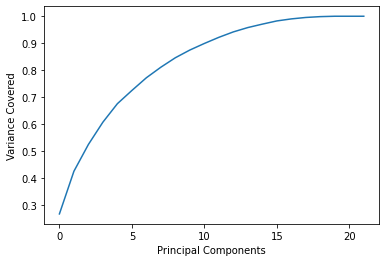

In [51]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 16 components to cover more than 95% of variance

In [52]:
pca = PCA (n_components = 16)
new_pcomp_reg = pca.fit_transform(x_reg_scaled)
princi_comp_reg = pd.DataFrame(new_pcomp_reg, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
princi_comp_reg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.271266,0.781675,1.015272,-1.675985,-1.347248,1.694409,2.705931,0.273469,0.134164,0.196554,-1.210004,-0.954332,-0.099902,0.881921,-1.271545,0.057247
1,-1.873144,-1.834713,1.021439,-2.410996,-0.035626,1.323401,2.243787,0.071955,0.725851,-0.986388,-0.608167,-0.355175,0.240295,-0.513262,0.506053,-0.113482
2,-2.450262,-0.408600,1.065001,-2.882964,-0.652385,1.713019,2.257776,0.194137,-0.160286,-0.005872,-0.181477,0.355246,-0.351414,0.299850,-0.161146,-0.202693
3,-2.139981,-3.020025,-0.026909,0.563079,1.769825,1.381249,1.873334,-0.549280,-0.378341,0.588249,-0.754172,0.667512,0.391829,0.329080,-0.592470,-0.083123
4,-0.452139,1.107307,-0.183530,0.309804,-0.874429,1.823073,2.090426,-0.488229,1.187619,-1.048904,-0.607366,-1.451413,1.511516,-0.176030,-1.025591,0.443724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,-0.647556,-2.431140,1.907349,2.398995,1.309811,-0.905217,-1.106405,-0.282282,0.151880,0.243509,-1.073321,0.274128,0.290076,0.169220,0.030199,-0.041567
5992,-0.960798,-3.023338,1.457404,1.474539,1.324830,-0.886765,-1.192296,-0.312229,-0.640743,0.906162,-1.309170,0.521927,-0.275951,-0.000135,0.055343,0.171416
5993,-0.836113,-3.367346,0.751185,0.481947,1.009846,-1.044731,-1.309593,-0.531509,-0.137420,0.660575,-0.968380,0.623562,0.208348,0.328364,-0.573702,-0.132786
5994,-1.376545,-2.506401,0.819564,-0.592453,0.302661,-0.899242,-1.310586,-0.205106,0.761564,0.695598,-1.090384,-0.280830,-1.161529,-0.292508,0.297481,0.621566


In [53]:
princi_comp_reg.skew()

PC1    -0.049772
PC2     0.134773
PC3    -0.107053
PC4     0.101574
PC5     0.299266
PC6     0.160509
PC7     0.178793
PC8    -0.101381
PC9     0.243747
PC10   -0.047452
PC11    0.010943
PC12    0.075794
PC13    0.090148
PC14    0.118440
PC15    0.029936
PC16    0.475946
dtype: float64

In [54]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(princi_comp_reg,y_reg,test_size=0.25,random_state=42)

In [55]:
lr = LinearRegression()
lr.fit(x_train_reg,y_train_reg)

LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
def metric_score(clf,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True):
    if train:
        y_pred_reg = clf.predict(x_train_reg)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train_reg,y_pred_reg)*100:.2f}%')
        
    elif train == False:
        pred_reg = clf.predict(x_test_reg)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test_reg,pred_reg)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_reg,y_reg,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test_reg,pred_reg))
        print('MSE = ',mean_squared_error(y_test_reg,pred_reg))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test_reg,pred_reg)))

In [58]:
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 61.20%

 ======TESTING RESULT======
Accuracy Score: 62.05%
Cross Validation Score =  0.6090993209275982
MAE =  0.8616381215862502
MSE =  3.514913806024289
RMSE =  1.8748103386807662


We can note that we are getting training accuracy of 30% and Testing accuracy of 14% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [59]:
from sklearn.svm import SVR

In [60]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

In [61]:
#TRAINING THE MODELS
knn.fit(x_train_reg,y_train_reg)
dec.fit(x_train_reg,y_train_reg)
ran.fit(x_train_reg,y_train_reg)
svr.fit(x_train_reg,y_train_reg)
xgb.fit(x_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training and Testing accuracies for other models

In [62]:
print(lr.score(x_train_reg,y_train_reg))
print(knn.score(x_train_reg,y_train_reg))
print(dec.score(x_train_reg,y_train_reg))
print(ran.score(x_train_reg,y_train_reg))
print(svr.score(x_train_reg,y_train_reg))
print(xgb.score(x_train_reg,y_train_reg))

0.6120191013867337
0.7086252800418393
1.0
0.9428440614805248
0.6104610582857207
0.9931871420994647


In [63]:
print(lr.score(x_test_reg,y_test_reg))
print(knn.score(x_test_reg,y_test_reg))
print(dec.score(x_test_reg,y_test_reg))
print(ran.score(x_test_reg,y_test_reg))
print(svr.score(x_test_reg,y_test_reg))
print(xgb.score(x_test_reg,y_test_reg))

0.6205499044520518
0.5645862600388816
0.16502778340102953
0.6107221128645812
0.5858114383775523
0.5533352946855874


We can note, Linear Regression is our best model.

Now we need to check for overfitting

In [64]:
from sklearn.linear_model import Ridge, RidgeCV

In [65]:
ridgecv = RidgeCV(alphas = np.arange(0.001,10,0.01),normalize=True)
ridgecv.fit(x_train_reg,y_train_reg)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       9.661e+00, 9.671e+00, 9.681e+00, 9.691e+00, 9.701e+00, 9.711e+00,
       9.721e+00, 9.731e+00, 9.741e+00, 9.751e+00, 9.761e+00, 9.771e+00,
       9.781e+00, 9.791e+00, 9.801e+00, 9.811e+00, 9.821e+00, 9.831e+00,
       9.841e+00, 9.851e+00, 9.861e+00, 9.871e+00, 9.881e+00, 9.891e+00,
       9.901e+00, 9.911e+00, 9.921e+00, 9.931e+00, 9.941e+00, 9.951e+00,
       9.961e+00, 9.971e+00, 9.981e+00, 9.991e+00]),
        normalize=True)

In [66]:
ridgecv.alpha_

0.001

In [67]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_reg,y_train_reg)

Ridge(alpha=0.001)

In [68]:
ridge_model.score(x_test_reg,y_test_reg)

0.6205499035820488

We get very similar score to our R2 score, thus we can conclude, model is not overfitting.

Now, let's first try on our Classification Model

In [69]:
x_cl

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day,MinTemp1,...,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,0,2008.0,12.0,1.0,13.4,...,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,0,2008.0,12.0,2.0,7.4,...,44.0,4.0,22.0,44.0,25.0,1010.6,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,0,2008.0,12.0,3.0,12.9,...,46.0,19.0,26.0,38.0,30.0,1007.6,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,0,2008.0,12.0,4.0,9.2,...,24.0,11.0,9.0,45.0,16.0,1017.6,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,0,2008.0,12.0,5.0,17.5,...,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,0.0,0,2,0,0,2017.0,6.0,20.0,3.5,...,31.0,15.0,13.0,59.0,27.0,1024.7,1.696751,2.114077,9.4,20.9
8420,9,0.0,0,9,1,0,2017.0,6.0,21.0,2.8,...,31.0,13.0,11.0,51.0,24.0,1024.6,0.662706,1.515771,10.1,22.4
8421,9,0.0,6,9,3,0,2017.0,6.0,22.0,3.6,...,22.0,13.0,9.0,56.0,21.0,1023.5,0.531724,1.089647,10.9,24.5
8422,9,0.0,3,9,14,0,2017.0,6.0,23.0,5.4,...,37.0,9.0,9.0,53.0,24.0,1021.0,0.773309,1.513927,12.5,26.1


In [70]:
y_cl

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 5996, dtype: int64

Use Power Transformer to reduce skewness

In [71]:
x_cl_scaled = scaler.fit_transform(x_cl.values)
x_cl_scaled

array([[-1.44788516,  0.99390523,  0.78797944, ...,  0.50803077,
        -0.16333623, -0.09217871],
       [-1.44788516, -0.63274764,  0.95538746, ..., -0.92635208,
        -0.11111479,  0.32479134],
       [-1.44788516, -0.63274764,  1.12080764, ..., -0.76556768,
         0.55035826,  0.1442847 ],
       ...,
       [ 1.1647779 , -0.63274764, -0.45858937, ..., -1.20824633,
        -1.2077609 ,  0.35713897],
       [ 1.1647779 , -0.63274764, -1.05757832, ..., -0.9951985 ,
        -0.92924853,  0.61099285],
       [ 1.1647779 , -0.63274764,  0.09461652, ..., -0.76556768,
        -0.47666451,  0.5953751 ]])

Now, we use PCA to perform dimension reduction for our model

In [72]:
pca = PCA()

In [73]:
pca.fit_transform(x_cl_scaled)

array([[ 2.29013196e-02,  1.22589670e+00,  9.63181086e-01, ...,
        -5.29070562e-02,  3.33705405e-01, -1.08015445e-16],
       [-1.91774101e+00, -1.85053662e+00,  9.80051784e-01, ...,
         2.62228267e-01, -5.83363807e-02, -4.83204897e-17],
       [-2.47833949e+00, -4.09344825e-01,  1.03505314e+00, ...,
        -1.13015686e-02,  1.37482177e-01, -7.10327794e-17],
       ...,
       [-9.03954066e-01, -3.41020121e+00,  7.21684104e-01, ...,
         2.79646489e-01, -2.98893528e-01,  2.31766823e-18],
       [-1.43219574e+00, -2.53395777e+00,  7.89645810e-01, ...,
         3.45071763e-01, -3.97856729e-01,  2.02999937e-18],
       [-1.28050946e+00, -1.92615551e+00,  4.87031739e-02, ...,
         3.09870292e-01, -1.60341452e-01,  2.81411125e-18]])

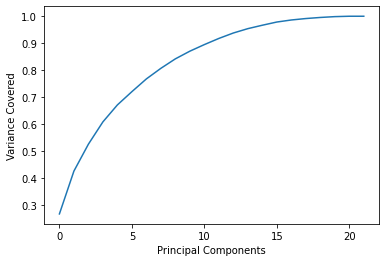

In [74]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 16 components to cover more than 95% of variance

In [77]:
pca = PCA (n_components = 17)
new_pcomp_cl = pca.fit_transform(x_cl_scaled)
princi_comp_cl = pd.DataFrame(new_pcomp_cl, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
princi_comp_cl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.022901,1.225897,0.963181,-2.069288,-0.253008,1.588666,2.658615,0.232726,0.189909,0.289241,-1.233050,-0.950530,-0.036290,0.806009,-1.248851,0.060052,0.110519
1,-1.917741,-1.850537,0.980052,-2.409444,0.178803,1.306074,2.248748,0.071561,0.729873,-0.998030,-0.598577,-0.363309,0.224272,-0.501205,0.497812,-0.133975,-0.018947
2,-2.478339,-0.409345,1.035053,-2.933432,-0.363375,1.703651,2.277410,0.195561,-0.175703,-0.030795,-0.177735,0.355131,-0.354168,0.305305,-0.183054,-0.185232,0.232236
3,-2.199297,-3.047002,-0.061499,0.718166,1.675241,1.349979,1.849351,-0.552728,-0.376954,0.591636,-0.758465,0.674697,0.411516,0.313073,-0.589033,-0.059785,0.341356
4,-0.084429,1.662053,-0.228588,-0.101922,0.225393,1.692980,2.021473,-0.541584,1.282669,-0.917623,-0.623045,-1.468257,1.572775,-0.267247,-0.963094,0.413313,0.170607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,-0.711984,-2.484582,1.906341,2.499204,0.979111,-0.907010,-1.126105,-0.282874,0.156735,0.246577,-1.075343,0.280021,0.299695,0.164385,0.031363,-0.045114,0.428180
5992,-1.027997,-3.071841,1.439200,1.585034,1.050310,-0.887487,-1.215306,-0.312529,-0.642988,0.902706,-1.316658,0.535770,-0.259212,-0.007275,0.070401,0.163454,0.353680
5993,-0.903954,-3.410201,0.721684,0.579726,0.795370,-1.040593,-1.327950,-0.530271,-0.137566,0.664092,-0.973435,0.633881,0.225756,0.316764,-0.576082,-0.105337,0.620790
5994,-1.432196,-2.533958,0.789646,-0.551805,0.192172,-0.886907,-1.313095,-0.201583,0.756132,0.713913,-1.101988,-0.262570,-1.154456,-0.290440,0.331215,0.605401,0.071567


In [78]:
princi_comp_cl.skew()

PC1    -0.051340
PC2     0.095859
PC3    -0.105343
PC4     0.139333
PC5     0.317649
PC6     0.157593
PC7     0.176711
PC8    -0.100352
PC9     0.247450
PC10   -0.047343
PC11    0.011362
PC12    0.072902
PC13    0.090179
PC14    0.121406
PC15    0.045409
PC16    0.440266
PC17    0.082793
dtype: float64

In [79]:
x_train_cl,x_test_cl,y_train_cl,y_test_cl = train_test_split(princi_comp_cl,y_cl,test_size=0.25,random_state=42)

In [80]:
ranc = RandomForestClassifier()
ranc.fit(x_train_cl,y_train_cl)

RandomForestClassifier()

In [81]:
def metric_score_cl(clf,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True):
    if train:
        y_pred_cl = clf.predict(x_train_cl)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train_cl,y_pred_cl)*100:.2f}%')
        
    elif train == False:
        pred_cl = clf.predict(x_test_cl)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test_cl,pred_cl)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test_cl,pred_cl,digits =2))

In [82]:
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 99.93%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1175
           1       1.00      1.00      1.00       324

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499



In [83]:
pred_cl = ranc.predict(x_test_cl)

In [84]:
conf_matrix = confusion_matrix(y_test_cl,pred_cl)
conf_matrix

array([[1174,    1],
       [   0,  324]], dtype=int64)

We can note that we are getting training accuracy of 100% and Testing accuracy of 99.93% with Random Forest model

We should now test the data on other models as well to check which model is giving us the best result

In [85]:
from sklearn.svm import SVC

In [86]:
log = LogisticRegression()
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [87]:
#TRAINING THE MODELS
log.fit(x_train_cl,y_train_cl)
knn.fit(x_train_cl,y_train_cl)
dec.fit(x_train_cl,y_train_cl)
svc.fit(x_train_cl,y_train_cl)
xgb.fit(x_train_cl,y_train_cl)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Training and Testing Accuracies for other models:

In [88]:
print(log.score(x_train_cl,y_train_cl))
print(svc.score(x_train_cl,y_train_cl))
print(knn.score(x_train_cl,y_train_cl))
print(dec.score(x_train_cl,y_train_cl))
print(ranc.score(x_train_cl,y_train_cl))
print(xgb.score(x_train_cl,y_train_cl))

1.0
1.0
0.9995552590615966
1.0
1.0
1.0


In [89]:
print(log.score(x_test_cl,y_test_cl))
print(svc.score(x_test_cl,y_test_cl))
print(knn.score(x_test_cl,y_test_cl))
print(dec.score(x_test_cl,y_test_cl))
print(ranc.score(x_test_cl,y_test_cl))
print(xgb.score(x_test_cl,y_test_cl))

1.0
1.0
1.0
0.9913275517011341
0.9993328885923949
0.9986657771847899


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

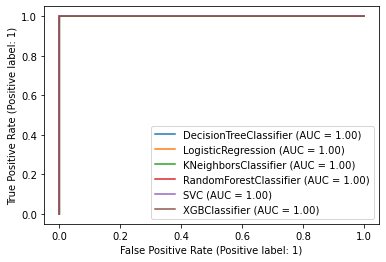

In [94]:

#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train_cl,y_train_cl)
plot_roc_curve(log,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(knn,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(ranc,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(svc,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(xgb,x_train_cl,y_train_cl,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

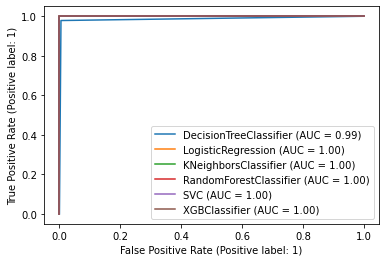

In [95]:
#CHECK ROC AUC CURVE FOR TESTING

disp = plot_roc_curve(dec,x_test_cl,y_test_cl)
plot_roc_curve(log,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(knn,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(ranc,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(svc,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(xgb,x_test_cl,y_test_cl,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

We can note, all our models are giving perfect accuracy.

Now, we perform Hyper Parameter Tuning on our best performing models, i.e., Random Forest

In [97]:
params = {'n_estimators':[2,10,20,30,40,50],
         'max_depth':[2,10,20,30,40,50],
         'min_samples_split':[2,10,20,30,40,50],
         'min_samples_leaf':[2,10,20,30,40,50]}

In [98]:
grid_cl = GridSearchCV(ranc, param_grid = params, n_jobs = -1)
grid_cl.fit(x_train_cl,y_train_cl)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 10, 20, 30, 40, 50],
                         'n_estimators': [2, 10, 20, 30, 40, 50]})

In [99]:
print('best parameters: ',grid_cl.best_params_)

best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}


In [100]:
ranc_grid = grid_cl.best_estimator_
ranc_grid.fit(x_train_cl,y_train_cl)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=40)

In [107]:
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 99.87%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1175
           1       0.99      1.00      1.00       324

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499



Slightly worse testing accuracy than our original model but frankly any of the models can be used as they are or near perfect accuracy models.
My choice would be original Random Forest model.